In [11]:
!pip install Ripser

In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.manifold import *
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from ripser import ripser
from persim import plot_diagrams
import seaborn as sns
import networkx as nx

In [0]:
import pandas as pd
import numpy as np
from ripser import ripser
from sklearn import preprocessing
from sklearn.cluster import *
from sklearn.manifold import *
from sklearn.cluster import *
import seaborn as sns
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture as GMM
from sklearn.mixture import BayesianGaussianMixture
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.neighbors import KernelDensity
from persim import plot_diagrams
from scipy import stats
from ripser import Rips

In [0]:
import plotly.graph_objects as go


Import Data Files : Data files are basically stock price data of DOW index companies from 2006 - 2009

In [10]:
from google.colab import files
uploaded = files.upload()

Saving AXP.csv to AXP.csv
Saving BA.csv to BA.csv
Saving CAT.csv to CAT.csv
Saving DIS.csv to DIS.csv
Saving GE.csv to GE.csv
Saving HD.csv to HD.csv
Saving IBM.csv to IBM.csv
Saving INTC.csv to INTC.csv
Saving JNJ.csv to JNJ.csv
Saving JPM.csv to JPM.csv
Saving KO.csv to KO.csv
Saving MCD.csv to MCD.csv
Saving MMM.csv to MMM.csv
Saving MRK.csv to MRK.csv
Saving MSFT.csv to MSFT.csv
Saving PFE.csv to PFE.csv
Saving PG.csv to PG.csv
Saving UTX.csv to UTX.csv
Saving VZ.csv to VZ.csv
Saving WMT.csv to WMT.csv
Saving XOM.csv to XOM.csv


In [14]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "AXP.csv" with length 69905 bytes
User uploaded file "BA.csv" with length 69713 bytes
User uploaded file "CAT.csv" with length 69725 bytes
User uploaded file "DIS.csv" with length 70087 bytes
User uploaded file "GE.csv" with length 70379 bytes
User uploaded file "HD.csv" with length 70308 bytes
User uploaded file "IBM.csv" with length 71831 bytes
User uploaded file "INTC.csv" with length 70496 bytes
User uploaded file "JNJ.csv" with length 70059 bytes
User uploaded file "JPM.csv" with length 70370 bytes
User uploaded file "KO.csv" with length 70384 bytes
User uploaded file "MCD.csv" with length 69734 bytes
User uploaded file "MMM.csv" with length 69482 bytes
User uploaded file "MRK.csv" with length 70172 bytes
User uploaded file "MSFT.csv" with length 70583 bytes
User uploaded file "PFE.csv" with length 70388 bytes
User uploaded file "PG.csv" with length 70053 bytes
User uploaded file "UTX.csv" with length 69504 bytes
User uploaded file "VZ.csv" with length 70308 byt

Reading the data

In [0]:
substitute = []
fields = ['Date', 'Close']

for fn in uploaded.keys():
  frame = pd.read_csv(fn,skipinitialspace=True, usecols=fields,index_col='Date')
  frame['Company'] = fn
  substitute.append(frame)

data = pd.concat(substitute, axis=0)
data.index = pd.to_datetime(data.index, format="%Y/%m/%d")

In [0]:
data.reset_index(level=0, inplace=True)


In [17]:
data

,Date,Close,Company
0,2006-01-03,52.580002,AXP.csv
1,2006-01-04,51.950001,AXP.csv
2,2006-01-05,52.500000,AXP.csv
3,2006-01-06,52.680000,AXP.csv
4,2006-01-09,53.990002,AXP.csv
...,...,...,...
21121,2009-12-23,68.260002,XOM.csv
21122,2009-12-24,68.660004,XOM.csv
21123,2009-12-28,69.080002,XOM.csv
21124,2009-12-29,68.839996,XOM.csv


Converting the data into a data matrix with a date index and the corresponding stock prices

In [0]:
Matrix = data.pivot(index='Date', columns='Company', values='Close')

In [19]:
Matrix

Company,AXP.csv,BA.csv,CAT.csv,DIS.csv,GE.csv,HD.csv,IBM.csv,INTC.csv,JNJ.csv,JPM.csv,KO.csv,MCD.csv,MMM.csv,MRK.csv,MSFT.csv,PFE.csv,PG.csv,UTX.csv,VZ.csv,WMT.csv,XOM.csv
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,52.580002,70.440002,57.799999,24.070601,34.009617,41.240002,82.059998,25.570000,61.630001,40.189999,20.450001,33.520000,79.110001,32.750000,26.840000,23.780001,58.779999,56.529999,27.321424,46.230000,58.470001
2006-01-04,51.950001,71.169998,59.270000,23.666136,33.961540,40.480000,81.949997,25.910000,62.580002,39.619999,20.410000,33.820000,78.709999,33.130001,26.969999,24.549999,58.889999,56.189999,28.121822,46.320000,58.570000
2006-01-05,52.500000,70.330002,59.270000,24.080465,33.875000,40.080002,82.500000,26.270000,62.320000,39.740002,20.510000,33.860001,77.989998,33.180000,26.990000,24.580000,58.700001,55.980000,28.445580,45.689999,58.279999
2006-01-06,52.680000,69.349998,60.450001,24.406010,34.105770,40.380001,84.949997,26.309999,62.599998,40.020000,20.705000,34.060001,78.629997,33.119999,26.910000,24.850000,58.639999,56.160000,28.193768,45.880001,59.430000
2006-01-09,53.990002,68.769997,61.549999,24.662500,34.019230,40.820000,83.730003,26.469999,62.990002,40.669998,20.805000,34.709999,79.019997,33.660000,26.860001,24.850000,59.080002,56.799999,28.310680,45.709999,59.400002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-23,41.209999,54.959999,58.320000,32.430000,14.817307,29.000000,130.000000,20.100000,64.570000,41.560001,28.645000,63.360001,82.190002,37.250000,30.920000,18.580000,61.310001,69.510002,31.166052,53.320000,68.260002
2009-12-24,41.680000,55.480000,58.330002,32.290001,14.846154,29.170000,130.570007,20.330000,64.699997,41.889999,28.719999,63.419998,82.550003,36.990002,31.000000,18.600000,61.279999,70.360001,31.287977,53.599998,68.660004
2009-12-28,41.049999,55.139999,58.509998,31.910000,14.750000,29.180000,132.309998,20.299999,64.940002,41.720001,28.719999,63.610001,83.449997,37.290001,31.170000,18.629999,61.250000,70.459999,31.409903,53.980000,69.080002


Defining a function to compute the correlation between stock prices of the companies in the DOW index for a specified time range starting from a date 'sd' for a period of 't' days.

In [0]:
def function(sd,t):

  df = Matrix[sd:].head(t)
  df_corr = df.corr(method ='pearson')
  df_distance = df_corr.applymap(distance)

  return(df,df_corr,df_distance)


Defining the distance function used to assign weights to our graph network

In [0]:
def distance(x):
  return(np.sqrt(2*(1-x)))

Testing the hypothesis on the data from before and at the onset of the financial crisis. We expect the Correlation between stock prices to be stronger and show greater correspondence at the period of the crisis and to be weaker during normal market conditions away from the Financial crash that occured around September 15 2008.

We check 2006 and 2009 and then Late 2007 - 2008 periods where the recession is said to have set in. 

The Correlation Network is constructed with edges plotted between nodes of high correlation. This is done away from crisis periods and during crisis periods for comparison.

A box plot of the degrees of the nodes in the network is also plotted to indicate the range of degrees of highly correlated nodes
in the network

**Sublevel sets** : We compute the sublevel sets of the weight function (distance function based on correlation matrix) defined earlier. Each sublevel set at a threshold level ranging from 0 to 2 yields a subgraph containing only those edges for which d(i,j) <= threshold. When threshold is small, the subgraph only contains nodes between highly correlated nodes( Correlation close to 1 -> weights close to 0). As threshold is gradually increased upto the critical value 1.41214, edges between low correlated nodes are progressively added to the network

2006 and 2009 - Before and After the crisis

*2006* - March

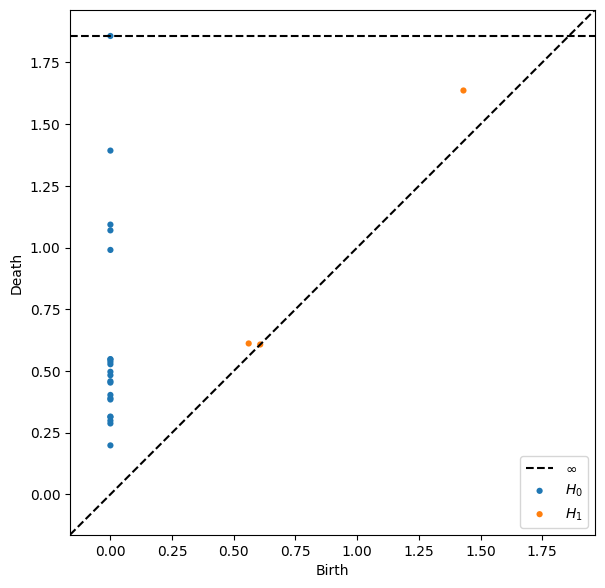

In [77]:
df = pd.DataFrame()

df,df_corr,df_distance = function('2006-03-05',10)

X = df_distance.to_numpy()

dgms = ripser(X,distance_matrix=True, thresh = 2)['dgms']

fig = plt.figure(figsize=(15,15))
plt.subplot(211)

plot_diagrams(dgms)


Number of edges :


13

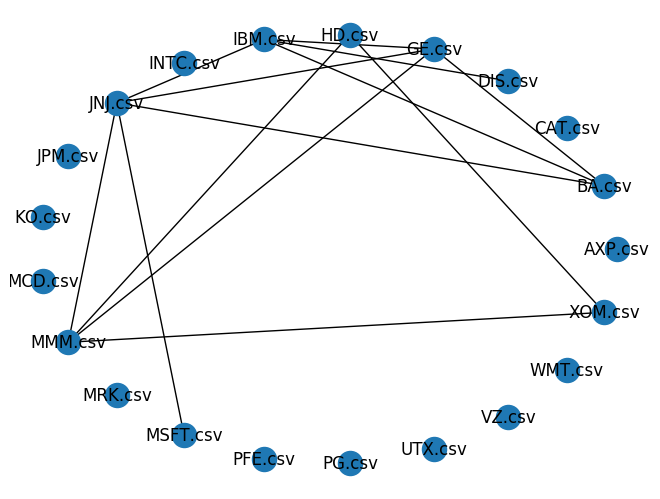

In [78]:
# Correlation network above threshold : Shows edges if correlation is greater than threshold

thr = 0.9
G=nx.Graph()
for fn in uploaded.keys():
  G.add_node(fn)

for i in uploaded.keys():
  for j in uploaded.keys():
    if abs(df_corr[i][j]) >= thr and i!=j:
      G.add_edge(i,j)

nx.draw_circular(G,with_labels=True)
print( 'Number of edges :' )
G.number_of_edges()

{'boxes': [<matplotlib.lines.Line2D at 0x7f73857809b0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f738578b240>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f738578bc18>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f738578b8d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7385780b00>,
  <matplotlib.lines.Line2D at 0x7f7385780eb8>]}

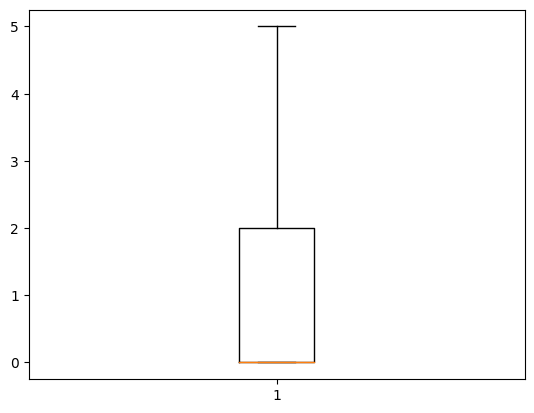

In [65]:
#Box plot of the degree of vertices of the above graph

my_degrees = G.degree()

degree_values = [v for k, v in my_degrees]

fig = plt.figure();
plt.boxplot(degree_values)

2006 April

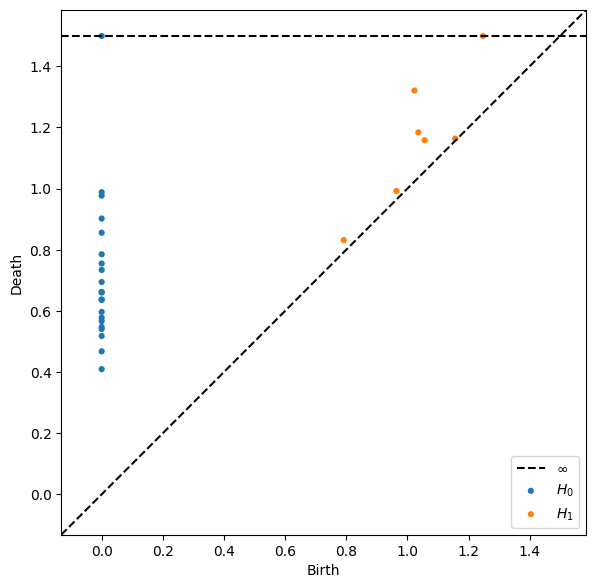

In [66]:
df = pd.DataFrame()

df,df_corr,df_distance = function('2006-04-18',10)

X = df_distance.to_numpy()

dgms = ripser(X,distance_matrix=True, thresh = 1.4)['dgms']

fig = plt.figure(figsize=(15,15))
plt.subplot(211)

plot_diagrams(dgms)


Number of edges :


1

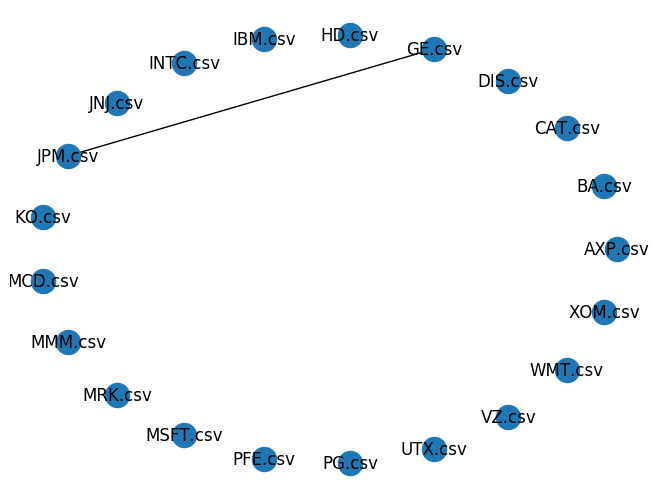

In [67]:
# Correlation network above threshold : Shows edges if correlation is greater than threshold

thr = 0.9
G=nx.Graph()
for fn in uploaded.keys():
  G.add_node(fn)

for i in uploaded.keys():
  for j in uploaded.keys():
    if abs(df_corr[i][j]) >= thr and i!=j:
      G.add_edge(i,j)

nx.draw_circular(G,with_labels=True)
print( 'Number of edges :' )
G.number_of_edges()

{'boxes': [<matplotlib.lines.Line2D at 0x7f73877b8400>],
 'caps': [<matplotlib.lines.Line2D at 0x7f73875c4898>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f73875c4d68>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f73875c4828>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f73877b80b8>,
  <matplotlib.lines.Line2D at 0x7f73877b8630>]}

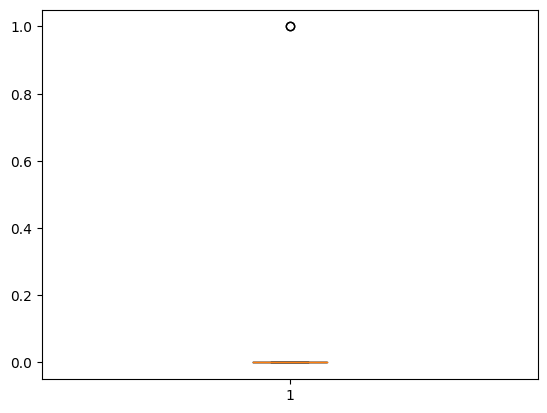

In [68]:
#Box plot of the degree of vertices of the above graph

my_degrees = G.degree()

degree_values = [v for k, v in my_degrees]

fig = plt.figure();
plt.boxplot(degree_values)

2006 - Jan


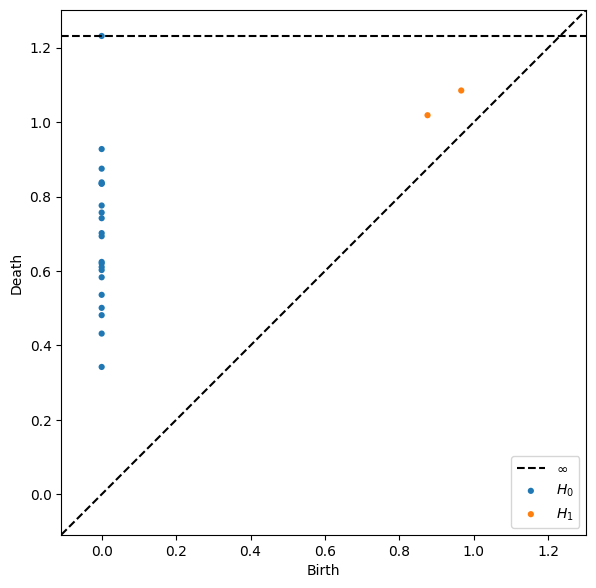

In [71]:
df = pd.DataFrame()

df,df_corr,df_distance = function('2006-01-05',10)

X = df_distance.to_numpy()

dgms = ripser(X,distance_matrix=True, thresh = 1.4)['dgms']

fig = plt.figure(figsize=(15,15))
plt.subplot(211)

plot_diagrams(dgms)


Number of edges :


2

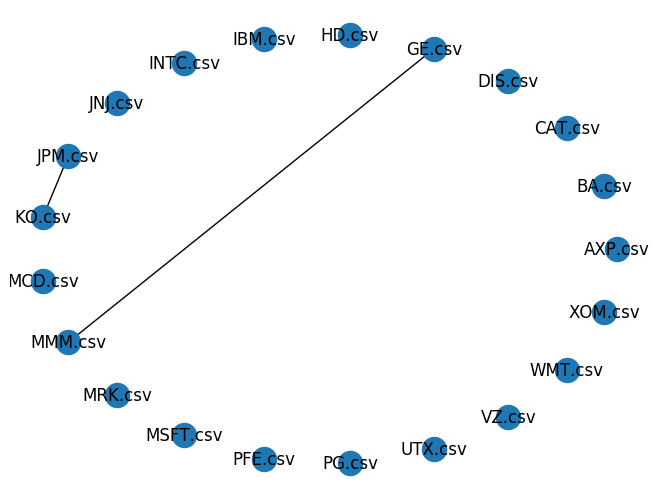

In [72]:
# Correlation network above threshold : Shows edges if correlation is greater than threshold

thr = 0.9
G=nx.Graph()
for fn in uploaded.keys():
  G.add_node(fn)

for i in uploaded.keys():
  for j in uploaded.keys():
    if abs(df_corr[i][j]) >= thr and i!=j:
      G.add_edge(i,j)

nx.draw_circular(G,with_labels=True)
print( 'Number of edges :' )
G.number_of_edges()

{'boxes': [<matplotlib.lines.Line2D at 0x7fca66a03cf8>],
 'caps': [<matplotlib.lines.Line2D at 0x7fca669fc588>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fca669fcf60>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fca669fcc18>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fca66a03e48>,
  <matplotlib.lines.Line2D at 0x7fca669fc240>]}

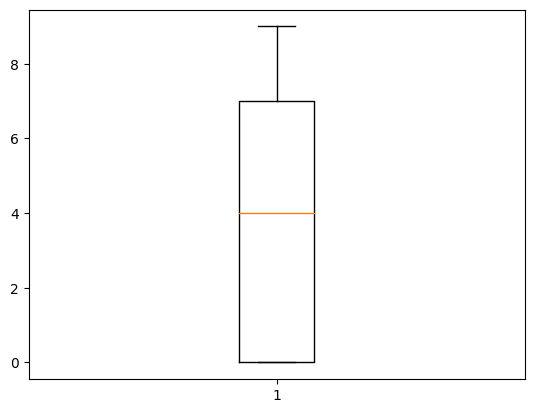

In [0]:
#Box plot of the degree of vertices of the above graph

my_degrees = G.degree()

degree_values = [v for k, v in my_degrees]

fig = plt.figure();
plt.boxplot(degree_values)

2009 April

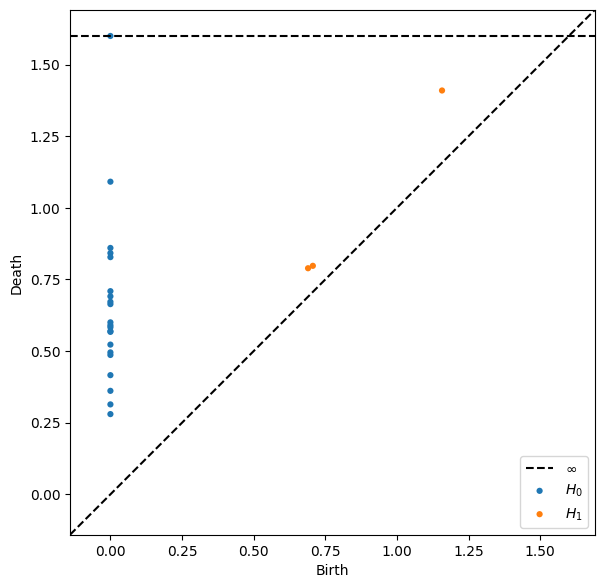

In [36]:
df = pd.DataFrame()

df,df_corr,df_distance = function('2009-04-15',10)

X = df_distance.to_numpy()

dgms = ripser(X,distance_matrix=True, thresh = 2)['dgms']

fig = plt.figure(figsize=(15,15))
plt.subplot(211)

plot_diagrams(dgms)

Number of edges :


5

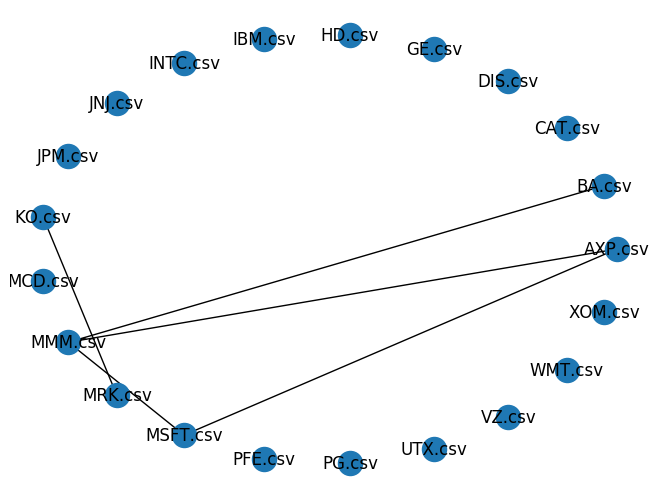

In [37]:
# Correlation network above threshold : Shows edges if correlation is greater than threshold

thr = 0.9
G=nx.Graph()
for fn in uploaded.keys():
  G.add_node(fn)

for i in uploaded.keys():
  for j in uploaded.keys():
    if abs(df_corr[i][j]) >= thr and i!=j:
      G.add_edge(i,j)

nx.draw_circular(G,with_labels=True)
print( 'Number of edges :' )
G.number_of_edges()

{'boxes': [<matplotlib.lines.Line2D at 0x7f7385a9df98>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7385aa9a58>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7385ab2470>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7385ab2128>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7385aa9358>,
  <matplotlib.lines.Line2D at 0x7f7385aa9710>]}

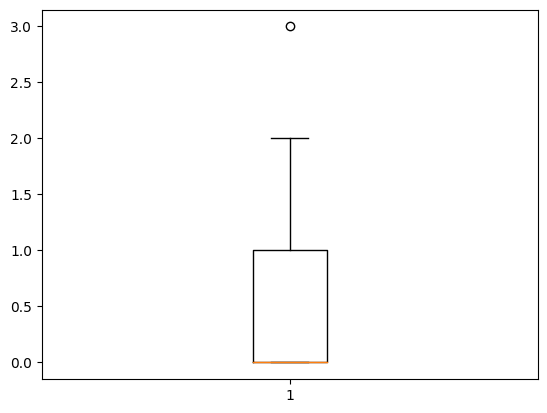

In [38]:
#Box plot of the degree of vertices of the above graph

my_degrees = G.degree()

degree_values = [v for k, v in my_degrees]

fig = plt.figure();
plt.boxplot(degree_values)

2009 SEPTEMBER

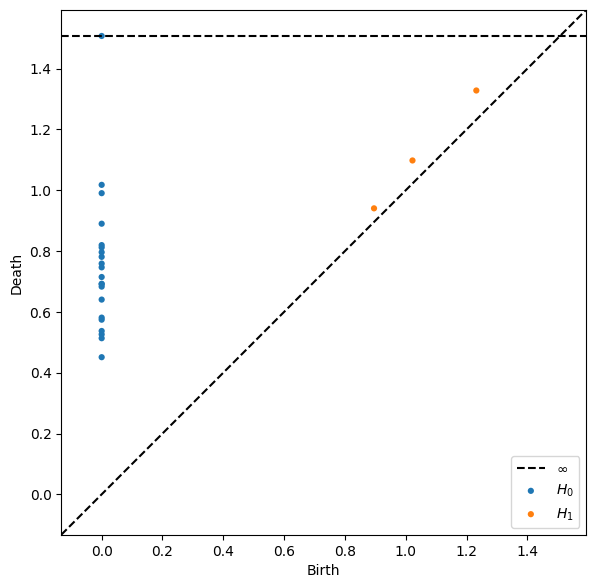

In [44]:
df = pd.DataFrame()

df,df_corr,df_distance = function('2009-09-15',10)

X = df_distance.to_numpy()

dgms = ripser(X,distance_matrix=True, thresh = 2)['dgms']

fig = plt.figure(figsize=(15 ,15))
plt.subplot(211)

plot_diagrams(dgms)

Number of edges :


0

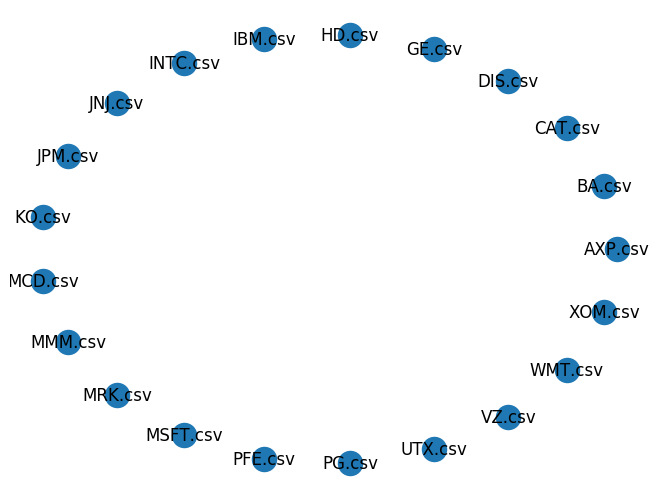

In [45]:
# Correlation network above threshold : Shows edges if correlation is greater than threshold

thr = 0.9
G=nx.Graph()
for fn in uploaded.keys():
  G.add_node(fn)

for i in uploaded.keys():
  for j in uploaded.keys():
    if abs(df_corr[i][j]) >= thr and i!=j:
      G.add_edge(i,j)

nx.draw_circular(G,with_labels=True)
print( 'Number of edges :' )
G.number_of_edges()

{'boxes': [<matplotlib.lines.Line2D at 0x7f7385c6d518>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7385c6dd68>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7385c64780>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7385c64438>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7385c6d668>,
  <matplotlib.lines.Line2D at 0x7f7385c6da20>]}

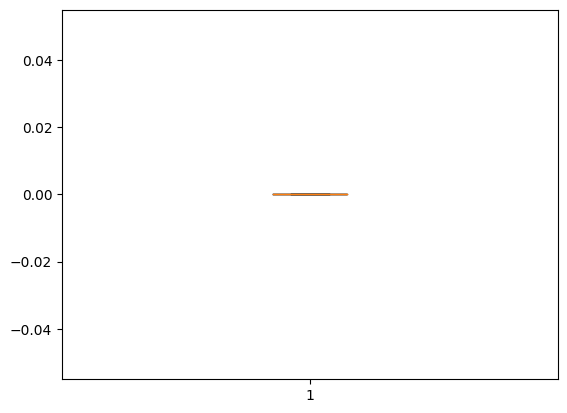

In [46]:
#Box plot of the degree of vertices of the above graph

my_degrees = G.degree()

degree_values = [v for k, v in my_degrees]

fig = plt.figure();
plt.boxplot(degree_values)

2007-2008 Crash Period

2007 November

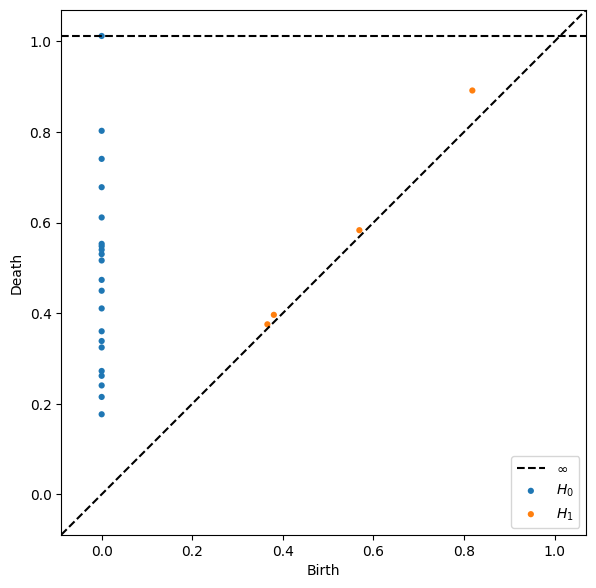

In [47]:
df = pd.DataFrame()

df,df_corr,df_distance = function('2007-11-15',10)

X = df_distance.to_numpy()

dgms = ripser(X,distance_matrix=True, thresh = 2)['dgms']

fig = plt.figure(figsize=(15,15))
plt.subplot(211)

plot_diagrams(dgms)

Number of edges :


20

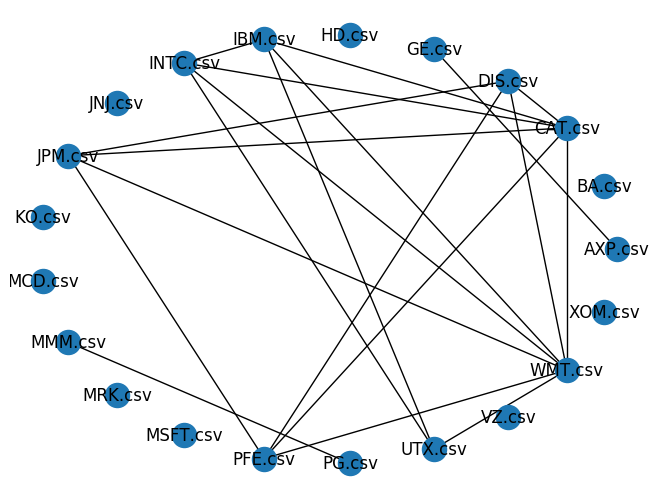

In [48]:
# Correlation network above threshold : Shows edges if correlation is greater than threshold

thr = 0.9
G=nx.Graph()
for fn in uploaded.keys():
  G.add_node(fn)

for i in uploaded.keys():
  for j in uploaded.keys():
    if abs(df_corr[i][j]) >= thr and i!=j:
      G.add_edge(i,j)

nx.draw_circular(G,with_labels=True)
print( 'Number of edges :' )
G.number_of_edges()

{'boxes': [<matplotlib.lines.Line2D at 0x7f73876e35c0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f73876e3e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f73876f8828>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f73876f84e0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f73876e3710>,
  <matplotlib.lines.Line2D at 0x7f73876e3ac8>]}

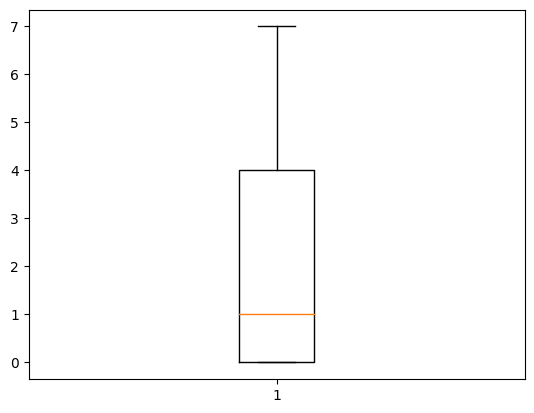

In [49]:
#Box plot of the degree of vertices of the above graph

my_degrees = G.degree()

degree_values = [v for k, v in my_degrees]

fig = plt.figure();
plt.boxplot(degree_values)

2007 DECEMBER

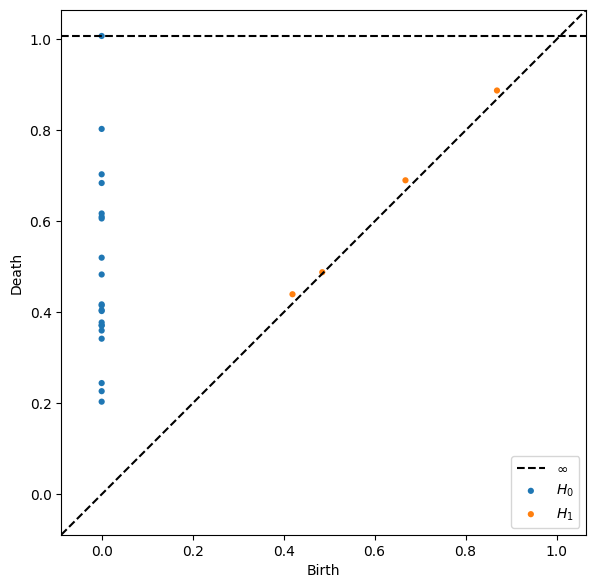

In [50]:
df = pd.DataFrame()

df,df_corr,df_distance = function('2007-12-15',10)

X = df_distance.to_numpy()

dgms = ripser(X,distance_matrix=True, thresh = 2)['dgms']

fig = plt.figure(figsize=(15,15))
plt.subplot(211)

plot_diagrams(dgms)

Number of edges :


21

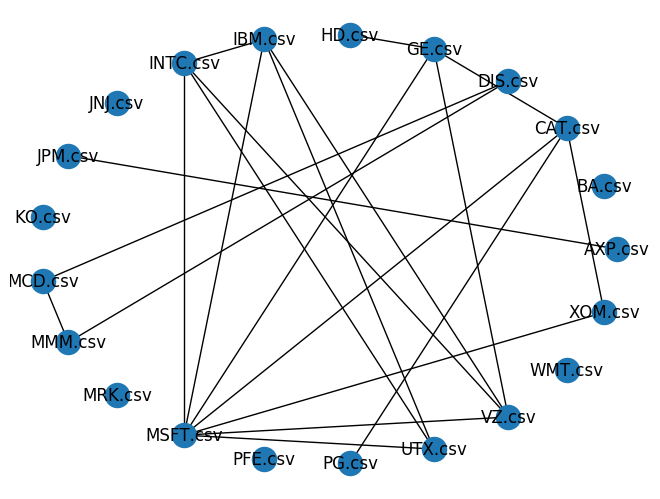

In [51]:
# Correlation network above threshold : Shows edges if correlation is greater than threshold

thr = 0.9
G=nx.Graph()
for fn in uploaded.keys():
  G.add_node(fn)

for i in uploaded.keys():
  for j in uploaded.keys():
    if abs(df_corr[i][j]) >= thr and i!=j:
      G.add_edge(i,j)

nx.draw_circular(G,with_labels=True)
print( 'Number of edges :' )
G.number_of_edges()

{'boxes': [<matplotlib.lines.Line2D at 0x7f7385881518>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7385881d68>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f738588b780>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f738588b438>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7385881668>,
  <matplotlib.lines.Line2D at 0x7f7385881a20>]}

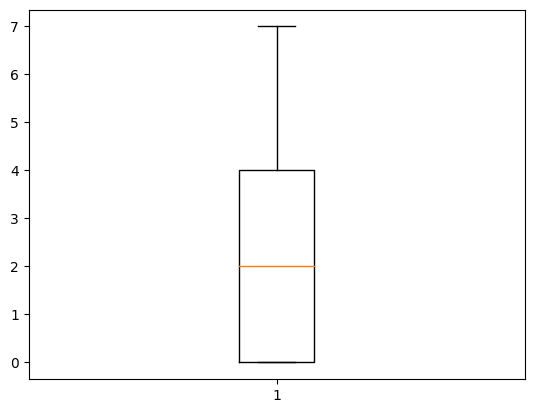

In [52]:
#Box plot of the degree of vertices of the above graph

my_degrees = G.degree()

degree_values = [v for k, v in my_degrees]

fig = plt.figure();
plt.boxplot(degree_values)

2008 FEB

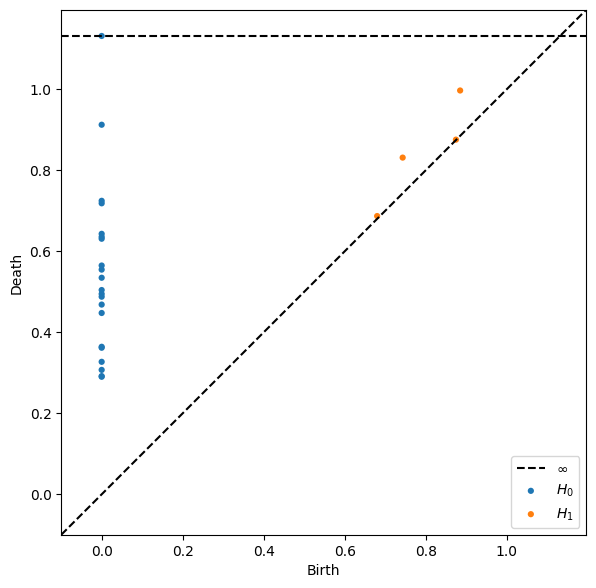

In [53]:
df = pd.DataFrame()

df,df_corr,df_distance = function('2008-02-15',10)

X = df_distance.to_numpy()

dgms = ripser(X,distance_matrix=True, thresh = 2)['dgms']

fig = plt.figure(figsize=(15,15))
plt.subplot(211)

plot_diagrams(dgms)

Number of edges :


8

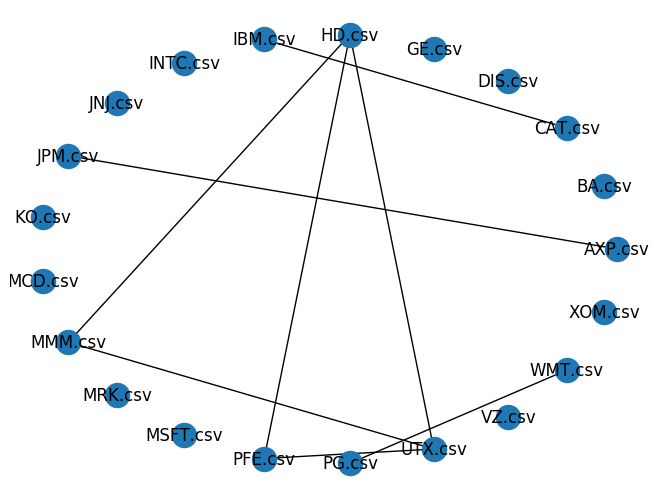

In [54]:
# Correlation network above threshold : Shows edges if correlation is greater than threshold

thr = 0.9
G=nx.Graph()
for fn in uploaded.keys():
  G.add_node(fn)

for i in uploaded.keys():
  for j in uploaded.keys():
    if abs(df_corr[i][j]) >= thr and i!=j:
      G.add_edge(i,j)

nx.draw_circular(G,with_labels=True)
print( 'Number of edges :' )
G.number_of_edges()

**2008 September**

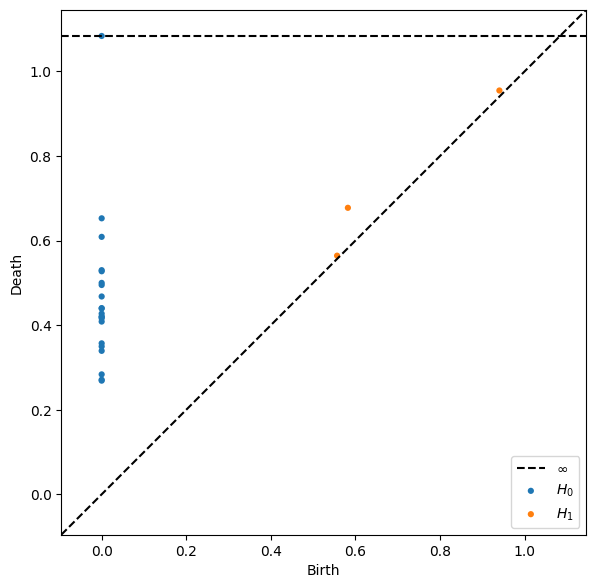

In [81]:
df = pd.DataFrame()

df,df_corr,df_distance = function('2008-09-10',10)

X = df_distance.to_numpy()

dgms = ripser(X,distance_matrix=True, thresh = 2)['dgms']

fig = plt.figure(figsize=(15,15))
plt.subplot(211)

plot_diagrams(dgms)

Number of edges :


18

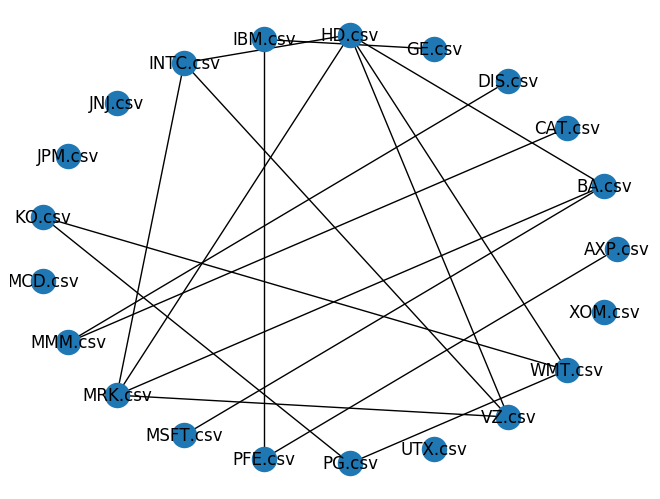

In [82]:
# Correlation network above threshold : Shows edges if correlation is greater than threshold

thr = 0.9
G=nx.Graph()
for fn in uploaded.keys():
  G.add_node(fn)

for i in uploaded.keys():
  for j in uploaded.keys():
    if abs(df_corr[i][j]) >= thr and i!=j:
      G.add_edge(i,j)

nx.draw_circular(G,with_labels=True)
print( 'Number of edges :' )
G.number_of_edges()

{'boxes': [<matplotlib.lines.Line2D at 0x7f738751e710>],
 'caps': [<matplotlib.lines.Line2D at 0x7f738751ea20>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7385bcfd68>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7385bcf940>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f738751ef28>,
  <matplotlib.lines.Line2D at 0x7f738751ea58>]}

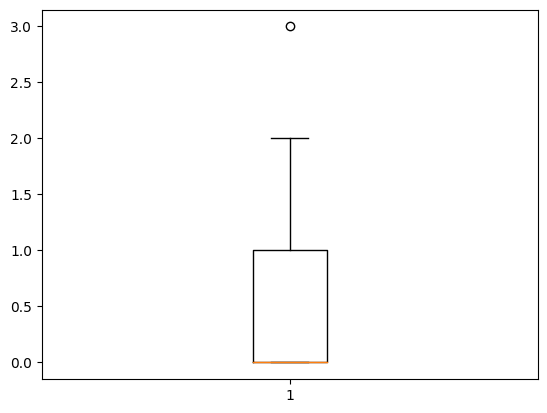

In [58]:
#Box plot of the degree of vertices of the above graph

my_degrees = G.degree()

degree_values = [v for k, v in my_degrees]

fig = plt.figure();
plt.boxplot(degree_values)

*2008* - November




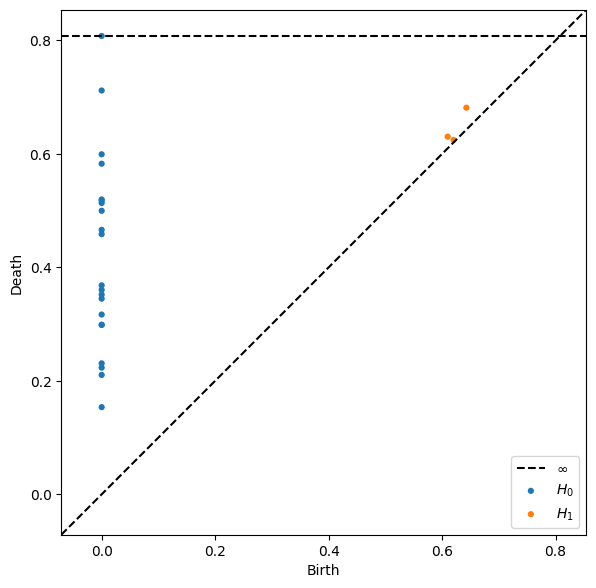

In [59]:
df = pd.DataFrame()

df,df_corr,df_distance = function('2008-11-05',10)

X = df_distance.to_numpy()

dgms = ripser(X,distance_matrix=True, thresh = 1.4)['dgms']

fig = plt.figure(figsize=(15,15))
plt.subplot(211)

plot_diagrams(dgms)

In [0]:
X.max()

1.8914033987078516

Number of edges :


28

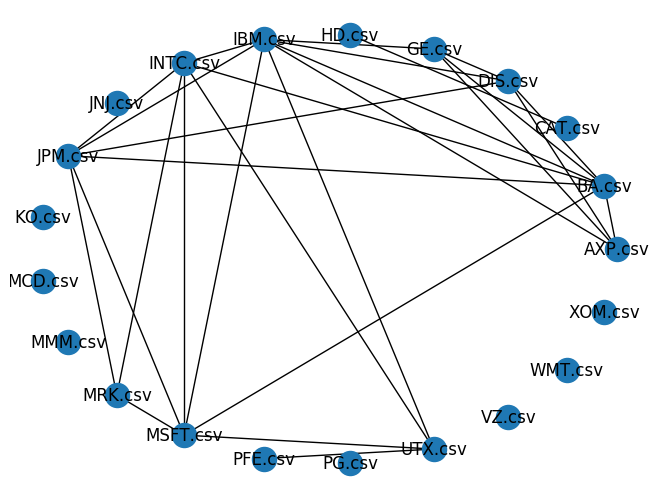

In [60]:
# Correlation network above threshold : Shows edges if correlation is greater than threshold

thr = 0.9
G=nx.Graph()
for fn in uploaded.keys():
  G.add_node(fn)

for i in uploaded.keys():
  for j in uploaded.keys():
    if abs(df_corr[i][j]) >= thr and i!=j:
      G.add_edge(i,j)

nx.draw_circular(G,with_labels=True)
print( 'Number of edges :' )
G.number_of_edges()

{'boxes': [<matplotlib.lines.Line2D at 0x7f7385bef828>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7385b98208>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7385a142e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7385a14c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7385b988d0>,
  <matplotlib.lines.Line2D at 0x7f7385b985c0>]}

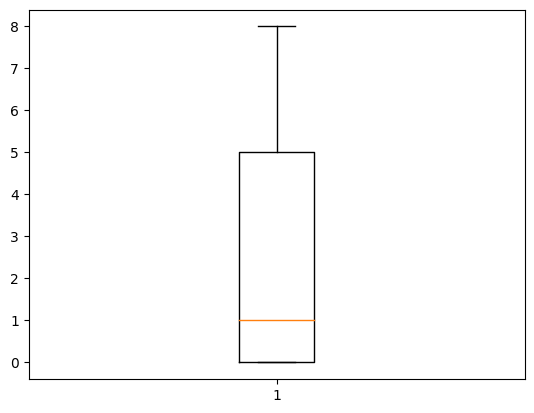

In [61]:
#Box plot of the degree of vertices of the above graph

my_degrees = G.degree()

degree_values = [v for k, v in my_degrees]

fig = plt.figure();
plt.boxplot(degree_values)

**SUPERLEVEL SETS**

Compute the super-levels sets of Weight function 2 -d which are sub-level set of w (d). . The critical value of the thresh-
old for the switch from anti-correlation to correlations is 0:5857864. Points in the persistent diagram with low vertical coordinates correspond to anti-correlation/non-correlation, and points with higher value of the vertical coordinate (other than 2)
indicates the appearance of edges between correlated nodes. A point on the persistent diagram with higher vertical coordinate represents the death of a connected component (or a loop), possibly formed by anti-correlated or low correlated nodes, when an edge
between correlated nodes is added to the networks.

Since the 0th homology group could not be plotted here these have been plotted as persistent bar plots seperately and attached along with the report



2006 & 2009 (Before entering into crisis and after. We see that the correlation stabilises and returns to a lower level overall when observed over subsquent periods


In [0]:
def super_distance(x):
  y= 2-np.sqrt(2*(1-x))
  return(y)
 


In [0]:
def super_function(sd,t):
  
  df = Matrix[sd:].head(t)
  df_corr = df.corr(method ='pearson')
  df_distance = df_corr.applymap(super_distance)

  return(df,df_corr,df_distance)


2006 - JAN


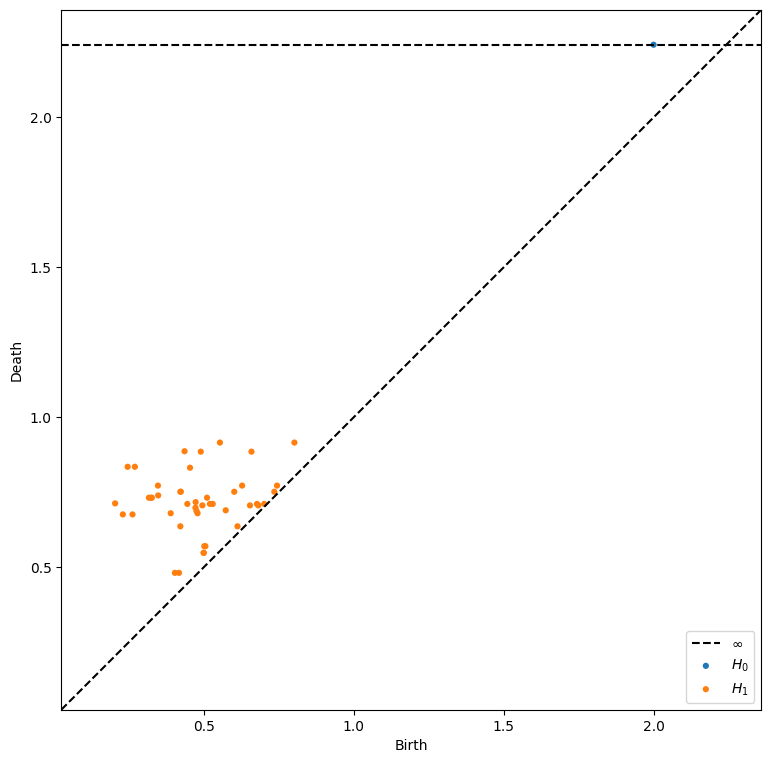

In [0]:
df = pd.DataFrame()

df,df_corr,df_distance = super_function('2006-01-05',10)

X = df_distance.to_numpy()

dgms = ripser(X,distance_matrix=True,thresh = 1)['dgms']

fig = plt.figure(figsize=(20,20))
plt.subplot(211)

plot_diagrams(dgms,show = True)

In [0]:
np.savetxt("2006JAN.csv", X, delimiter=",")

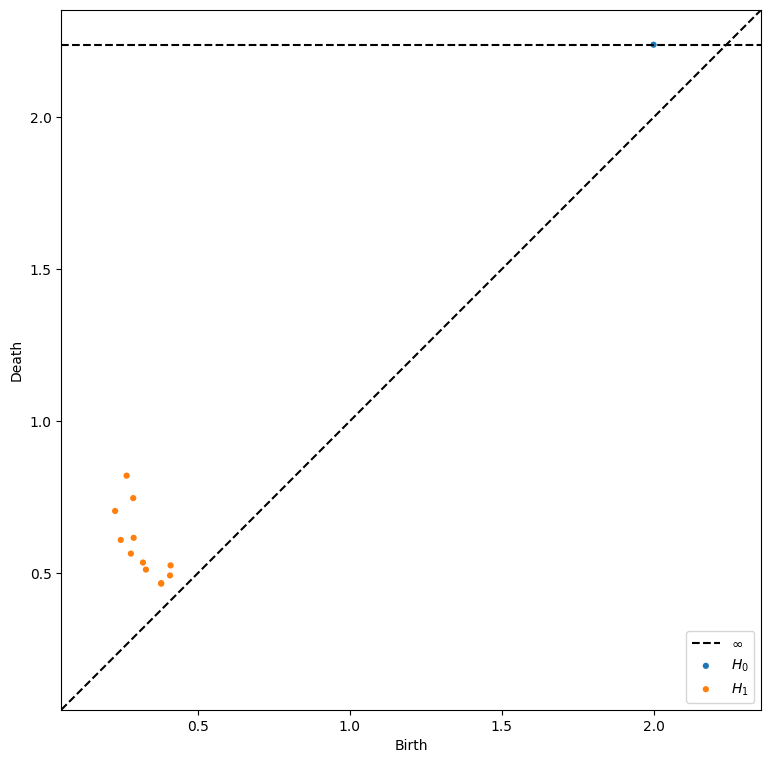

In [0]:
df = pd.DataFrame()

df,df_corr,df_distance = super_function('2006-02-05',10)

X = df_distance.to_numpy()

dgms = ripser(X,distance_matrix=True,thresh = 1)['dgms']

fig = plt.figure(figsize=(20,20))
plt.subplot(211)

plot_diagrams(dgms,show = True)

In [0]:
np.savetxt("2006FEB.csv", X, delimiter=",")

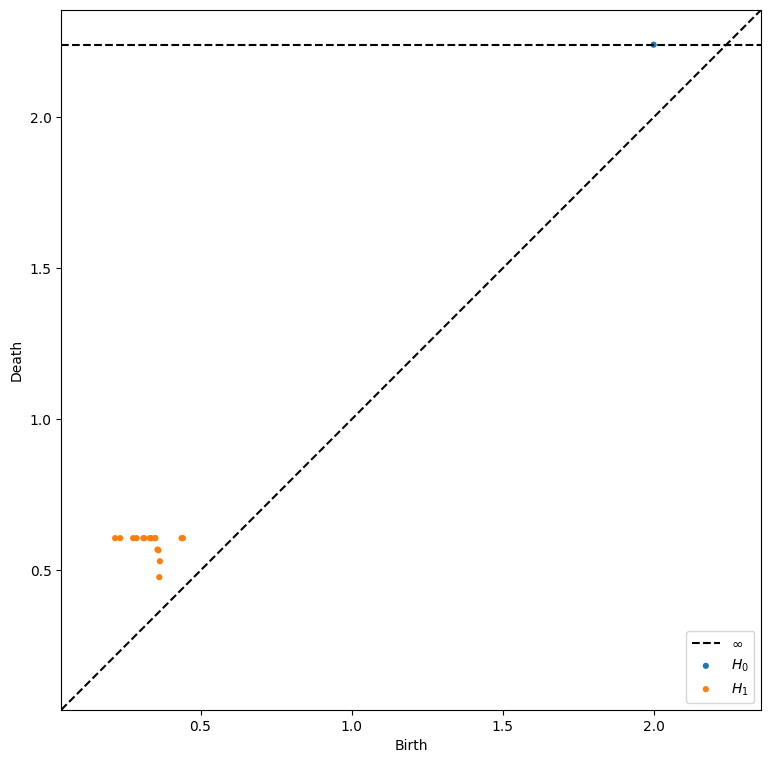

In [0]:
df = pd.DataFrame()

df,df_corr,df_distance = super_function('2006-03-05',10)

X = df_distance.to_numpy()

dgms = ripser(X,distance_matrix=True,thresh = 1)['dgms']

fig = plt.figure(figsize=(20,20))
plt.subplot(211)

plot_diagrams(dgms,show = True)

In [0]:
np.savetxt("2006MAR.csv", X, delimiter=",")

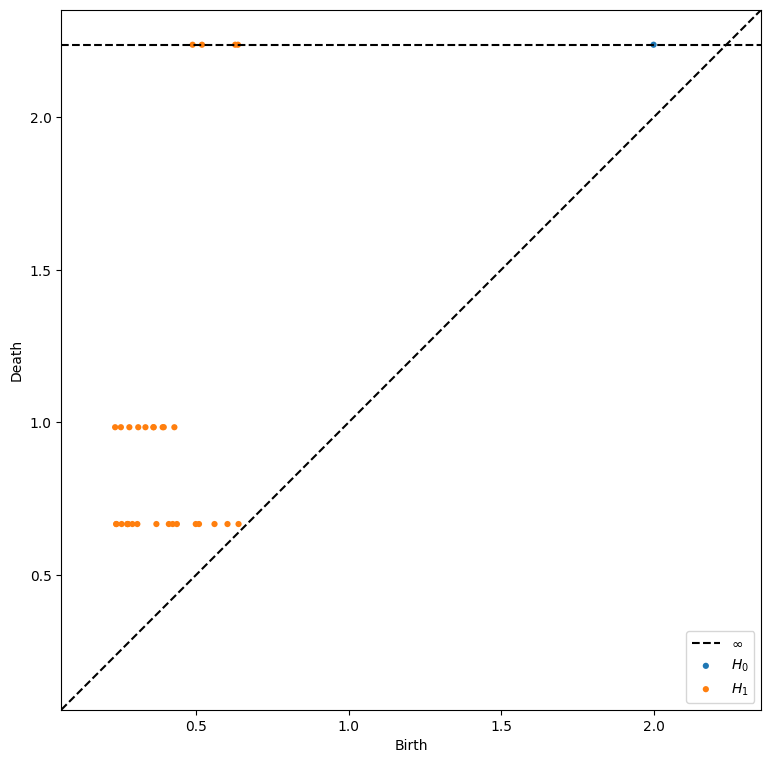

In [0]:
df = pd.DataFrame()

df,df_corr,df_distance = super_function('2009-06-10',10)

X = df_distance.to_numpy()

dgms = ripser(X,distance_matrix=True,thresh = 1)['dgms']

fig = plt.figure(figsize=(20,20))
plt.subplot(211)

plot_diagrams(dgms,show = True)

In [0]:
np.savetxt("2009JUN.csv", X, delimiter=",")

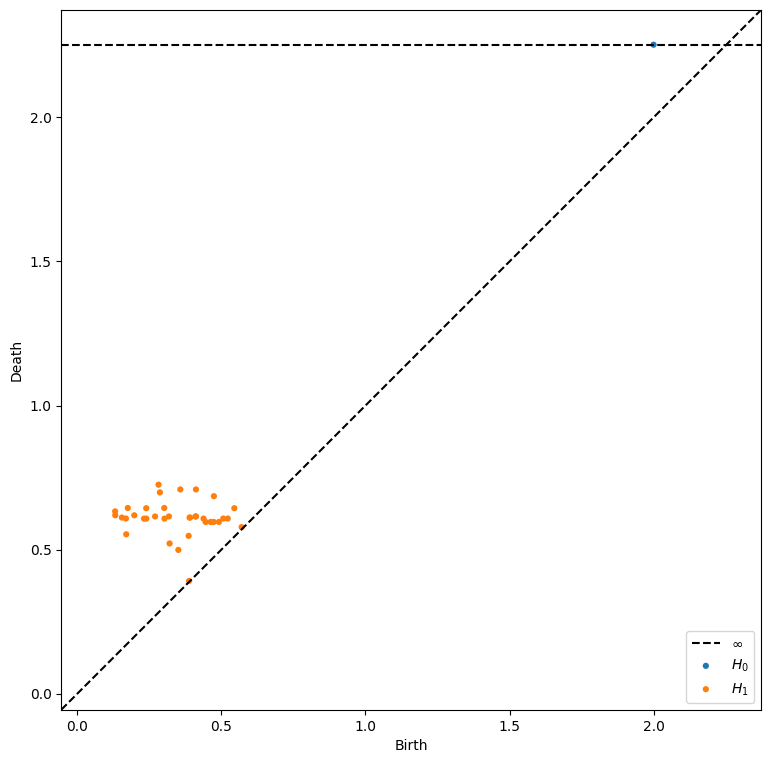

In [0]:
df = pd.DataFrame()

df,df_corr,df_distance = super_function('2009-09-10',10)

X = df_distance.to_numpy()

dgms = ripser(X,distance_matrix=True,thresh = 1)['dgms']

fig = plt.figure(figsize=(20,20))
plt.subplot(211)

plot_diagrams(dgms,show = True)

In [0]:
np.savetxt("2009SEP.csv", X, delimiter=",")

2007 - 2008 FINANCIAL CRASH

2007 DECEMBER

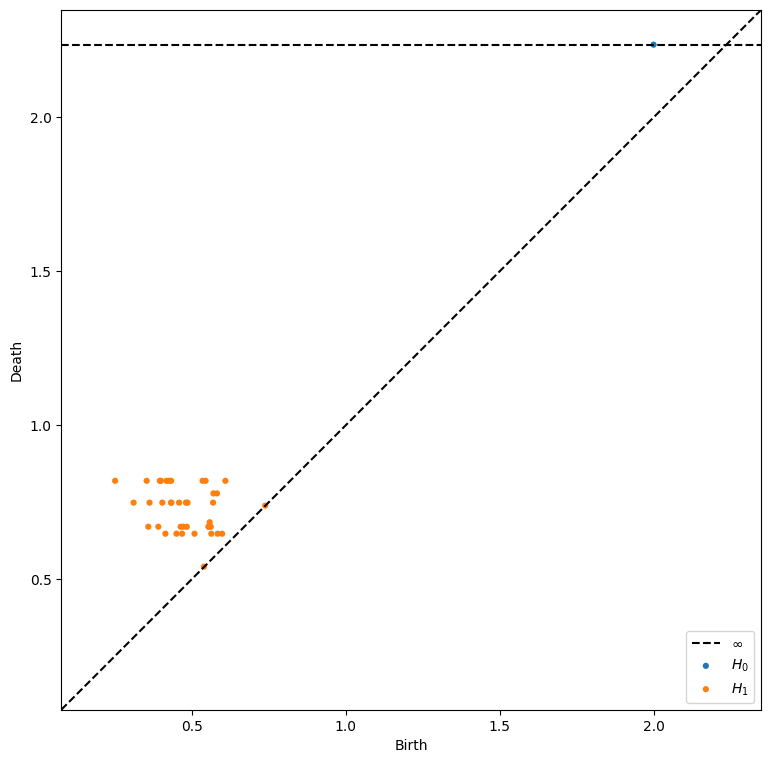

In [0]:
df = pd.DataFrame()

df,df_corr,df_distance = super_function('2007-11-10',10)

X = df_distance.to_numpy()

dgms = ripser(X,distance_matrix=True,thresh = 1)['dgms']

fig = plt.figure(figsize=(20,20))
plt.subplot(211)

plot_diagrams(dgms,show = True)

np.savetxt("2007NOV.csv", X, delimiter=",")

In [0]:
np.savetxt("2007NOV.csv", X, delimiter=",")

2007 DECEMBER

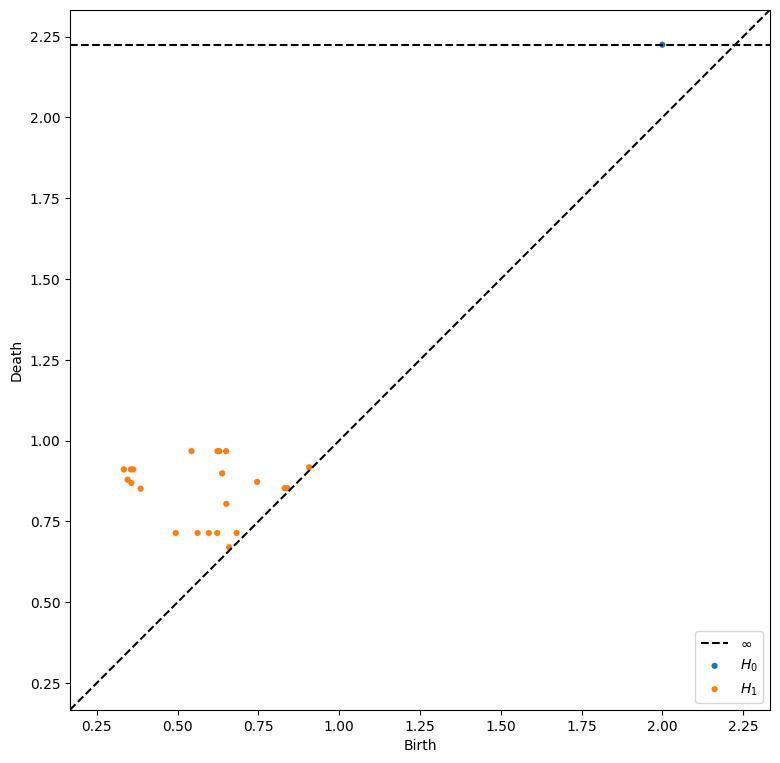

In [0]:
df = pd.DataFrame()

df,df_corr,df_distance = super_function('2007-12-10',10)

X = df_distance.to_numpy()

dgms = ripser(X,distance_matrix=True,thresh = 1)['dgms']

fig = plt.figure(figsize=(20,20))
plt.subplot(211)

plot_diagrams(dgms,show = True)

np.savetxt("2007DEC.csv", X, delimiter=",")

In [0]:
np.savetxt("2007DEC.csv", X, delimiter=",")

2008 MARCH

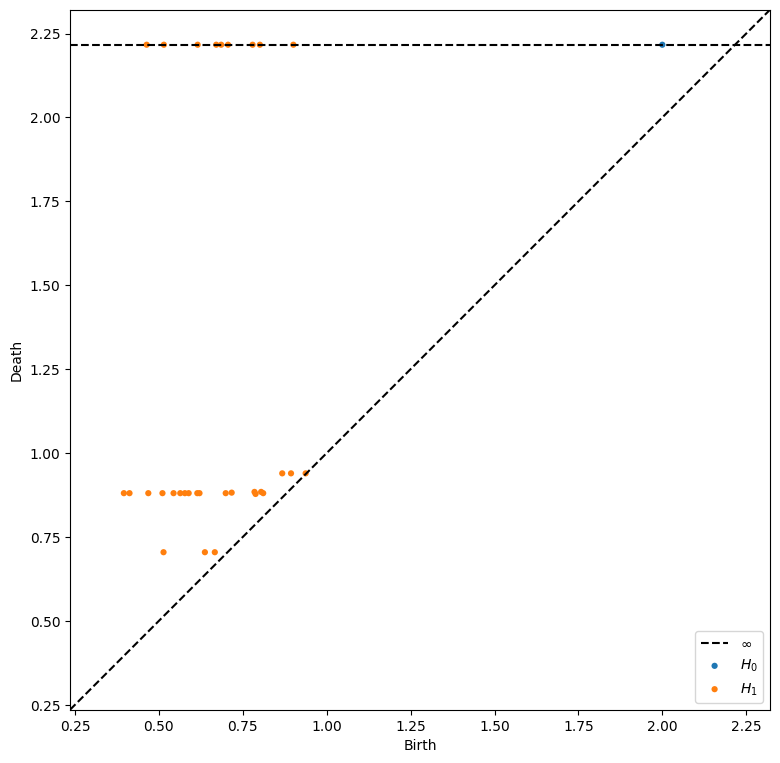

In [0]:
df = pd.DataFrame()

df,df_corr,df_distance = super_function('2008-03-05',10)

X = df_distance.to_numpy()

dgms = ripser(X,distance_matrix=True,thresh = 1)['dgms']

fig = plt.figure(figsize=(20,20))
plt.subplot(211)

plot_diagrams(dgms,show = True)



In [0]:
# Output to file
np.savetxt("2008MAR.csv", X, delimiter=",")

2008 SEPTEMBER

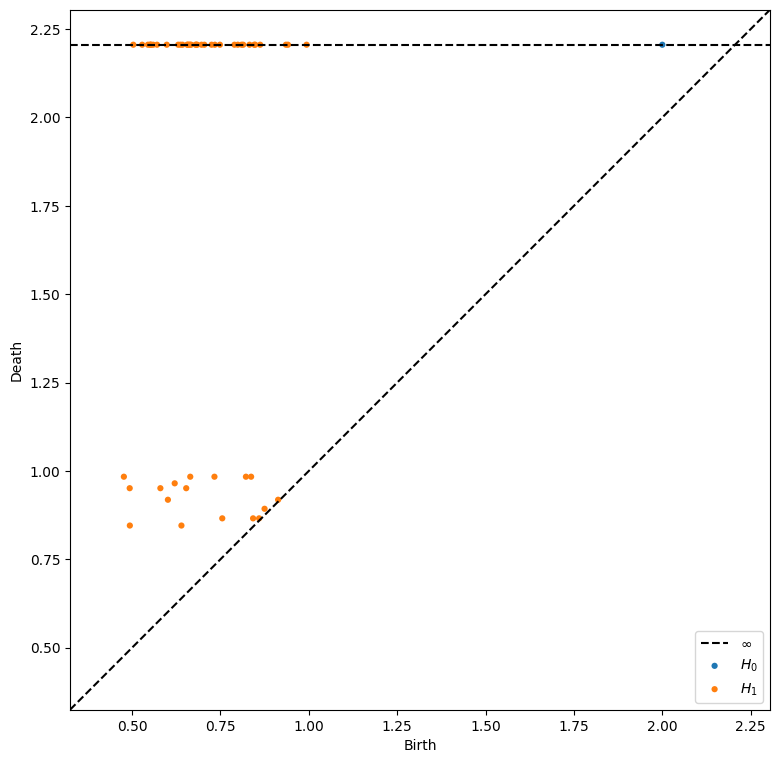

In [86]:
df = pd.DataFrame()

df,df_corr,df_distance = super_function('2008-09-10',10)

X = df_distance.to_numpy()

dgms = ripser(X,distance_matrix=True,thresh = 1)['dgms']

fig = plt.figure(figsize=(20,20))
plt.subplot(211)

plot_diagrams(dgms,show = True)



In [0]:
# Output to file
np.savetxt("2008SEP.csv", X, delimiter=",")

2008 JULY

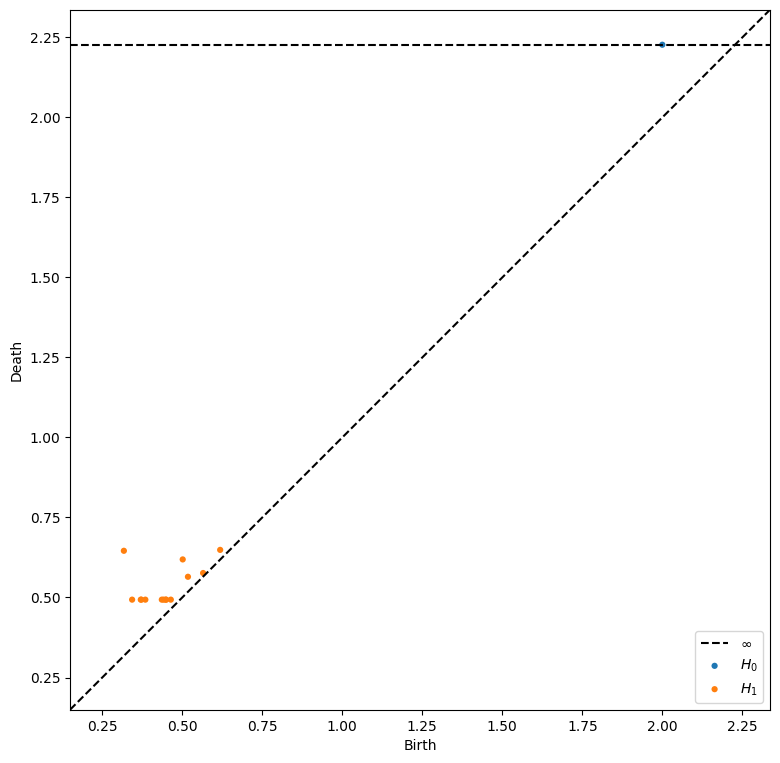

In [0]:
df = pd.DataFrame()

df,df_corr,df_distance = super_function('2008-07-05',10)

X = df_distance.to_numpy()

dgms = ripser(X,distance_matrix=True,thresh = 1)['dgms']

fig = plt.figure(figsize=(20,20))
plt.subplot(211)

plot_diagrams(dgms,show = True)

In [0]:
# Output to file
np.savetxt("2008JULY.csv", X, delimiter=",")

2008 AUGUST

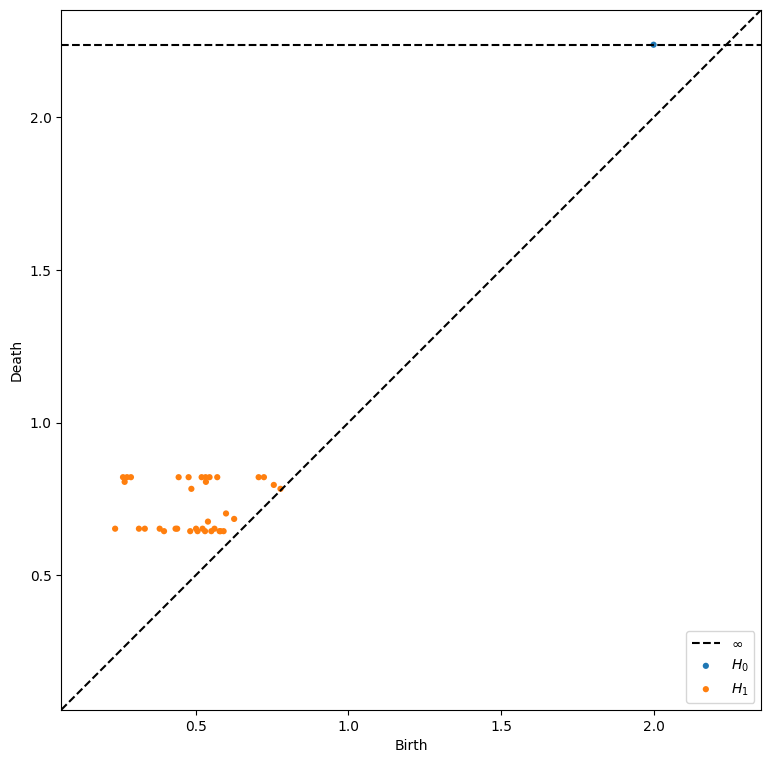

In [0]:
df = pd.DataFrame()

df,df_corr,df_distance = super_function('2008-08-05',10)

X = df_distance.to_numpy()

dgms = ripser(X,distance_matrix=True,thresh = 1)['dgms']

fig = plt.figure(figsize=(20,20))
plt.subplot(211)

plot_diagrams(dgms,show = True)

In [0]:
# Output to file
np.savetxt("2008AUG.csv", X, delimiter=",")

2008 OCTOBER

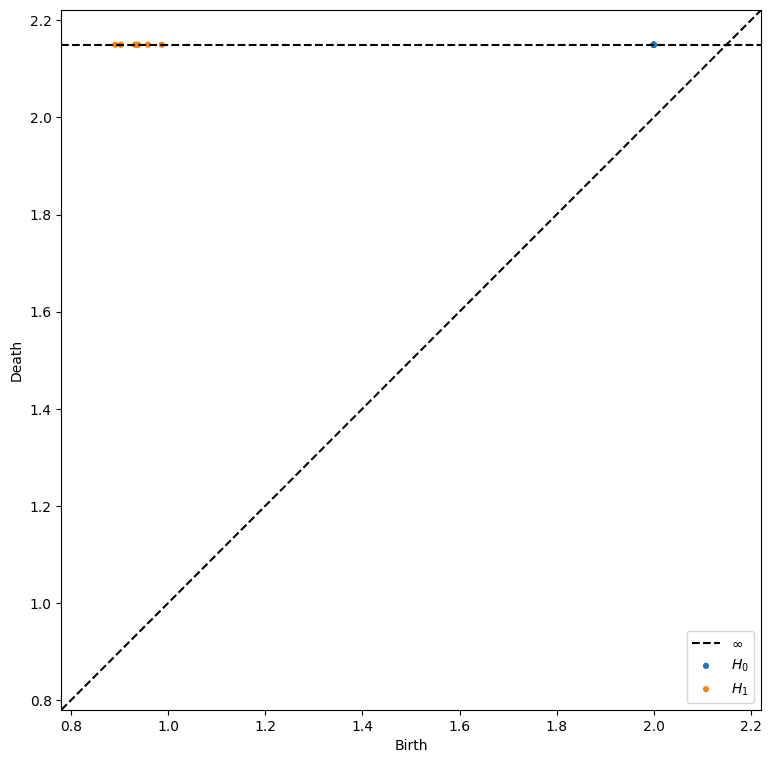

In [0]:
df = pd.DataFrame()

df,df_corr,df_distance = super_function('2008-10-05',10)

X = df_distance.to_numpy()

dgms = ripser(X,distance_matrix=True,thresh = 1)['dgms']

fig = plt.figure(figsize=(20,20))
plt.subplot(211)

plot_diagrams(dgms,show = True)

In [0]:
# Output to file
np.savetxt("2008OCT.csv", X, delimiter=",")

2008 NOVEMBER

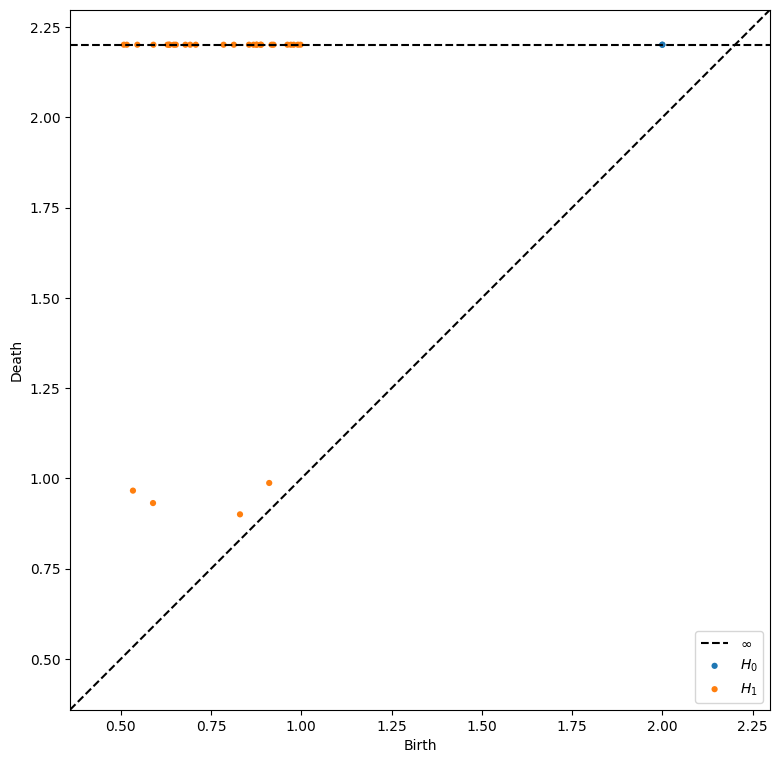

In [0]:
df = pd.DataFrame()

df,df_corr,df_distance = super_function('2008-11-05',10)

X = df_distance.to_numpy()

dgms = ripser(X,distance_matrix=True,thresh = 1)['dgms']

fig = plt.figure(figsize=(20,20))
plt.subplot(211)

plot_diagrams(dgms,show = True)

In [0]:
np.savetxt("2008NOV.csv", X, delimiter=",")